# Re-plot graphs for more detail

## 2d coloured plot

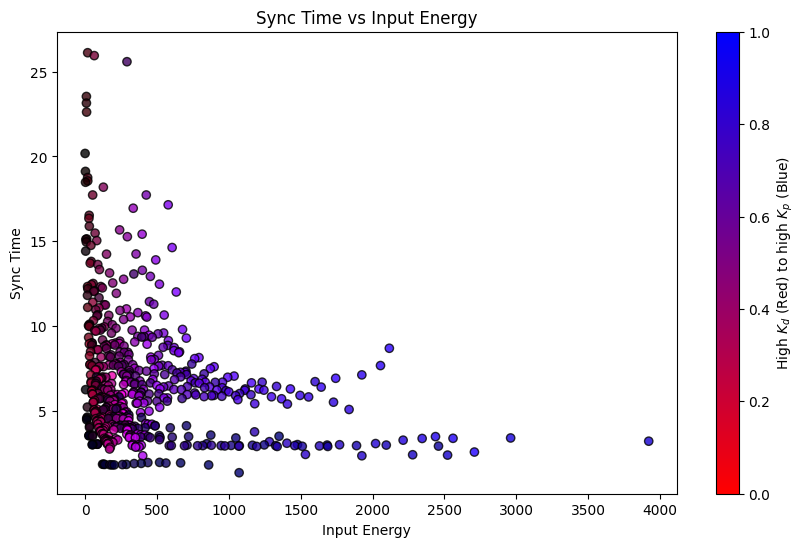

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

df = pd.read_csv("energy_to_sync3.csv")

# Remove the unnecessary index column
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Normalize kd and kp to [0,1] range
kd_norm = (df["kd"] - df["kd"].min()) / (df["kd"].max() - df["kd"].min())
kp_norm = (df["kp"] - df["kp"].min()) / (df["kp"].max() - df["kp"].min())

# Generate RGB colors (Red = kd, Blue = kp, Green = 0 for simplicity)
colors = np.stack([kd_norm, np.zeros_like(kd_norm), kp_norm], axis=1)

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot
plt.scatter(df["input_energy"], df["sync_time"], c=colors, alpha=0.8, edgecolors="k")

# Create color legend (for kd and kp blending)
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("kd_kp_cmap", [(1, 0, 0), (0.5, 0, 0.5), (0, 0, 1)])  # Red to Purple to Blue
norm = mcolors.Normalize(vmin=0, vmax=1)
cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label(r"High $K_{d}$ (Red) to high $K_{p}$ (Blue)")

# Labels and title
plt.xlabel("Input Energy")
plt.ylabel("Sync Time")
plt.title("Sync Time vs Input Energy")

# Show the plot
plt.show()